### Here we will use the fashin MNIST dataset to train a neural network to classify 10 different types of clothing.

In [1]:
# !pip install tensorflow===2.5.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


### the dataset that we will be using is Fashion MNIST data which is available directly in the tf.keras datasets API

In [31]:
#loading the dataset from tf.keras dataset API

fashion_mnist = tf.keras.datasets.fashion_mnist

In [32]:
# now we will call the load_data() on this fashion_mnist object
# this function will return us two sets of training and testing values for the graphics that contain the clothing items and their labels

(training_imgs, training_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [33]:
type(training_labels)
#the load_data() returns us 4 numpy ndarrays.

numpy.ndarray

In [34]:
print(len(set(training_labels)) )
print(len(set(test_labels)) )
# there are total 10 types of clothing items present in the dataset
# that's why we have 10 labels for training and testing data

10
10


In [35]:
print(f"Total number of training images is {len(training_imgs)}")
print("The size of each image is: ")
print(len(training_imgs[0]))
print(len(training_imgs[59999]))


Total number of training images is 60000
The size of each image is: 
28
28


In [36]:
print(f"Total number of testing images is {len(test_imgs)}")

Total number of testing images is 10000


9


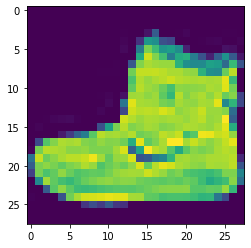

In [37]:
np.set_printoptions(linewidth=200)
plt.imshow(training_imgs[0])
print(training_labels[0])

In [38]:
training_imgs[0].shape

(28, 28)

In [39]:
print(training_imgs[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

### Its clearly visible that the cells in above array where the shoe is not present contains 0 and the cells forming the shape of the boot contains some intensity value between 1 and 255

8


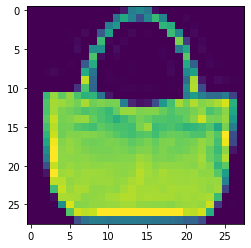

In [40]:
# lets see what is present at the 100th index of the training data
plt.imshow(training_imgs[100])
print(training_labels[100])
#its a handbag

### All of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [41]:
training_imgs = training_imgs/255.0
test_imgs = test_imgs/255.0

In [42]:
print(training_imgs[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

### Designing the model

In [43]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



- There are three layers in the above sequential mbodel
- <b>first layer</b>- flatten layer with input shape = 28X28, as each of our image contains 28X28 pixel values, so we are  so we're specifying that this is the shape that we should expect the data to be in. Flatten takes this 28 by 28 square and turns it into a simple linear array.
- <b>second layer</b> - the middle layer has 128 neuron in it.
<img src = "./imgs/middle_layer_picture.png" style ="width:200;height=200"/>

<p>The interesting stuff happens in the middle layer, sometimes also called a hidden layer. This has 128 neurons in it, and think about these as variables in a function. Maybe call them x1, x2 x3,..,x128. Now, there exists a rule that incorporates all of these that turns the 784 (28X28 = 724) values of an ankle boot into the value nine(label for ankle boot), and similar for all of the other 70,000. It's too complex a function for us to see by mapping the images ourselves, but that's what a neural net does. So, for example, if we then say the function was y = (w1*x1)+(w2*x2)+...(w128*x128). By figuring out the values of all these w, then y will be nine, when we have the input value of the shoe.</p>

- <b>third layer</b> - The last layer has 10 neurons in it because we have ten classes of clothing in the dataset. They should always match.

<b>Sequential:</b> That defines a SEQUENCE of layers in the neural network

<b>Flatten:</b> Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

<b>Dense:</b> Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

### Building the model

In [44]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_imgs, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4945 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3122 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2923 - accuracy: 0.8923


In [45]:
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8733


[0.35564130544662476, 0.8733000159263611]

## Exploration Exercises

### Exersice 1: 

The below code creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?


In [46]:
classifications = model.predict(test_imgs)
print(len(classifications))
print(type(classifications))
print(classifications.shape)

# the "classifications" contains predictions(lists) of 10000 testing images.
# we get 10000 lists inside this array

print(len(classifications[0]))
print(classifications[0])
print(test_labels[0])

#for each test image, we get a list of 10 numbers.
#These numbers are a probability that the value being classified is the corresponding value
#i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.
#For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

# here, in classifications[0], The 10th element on the list is the biggest, and the ankle boot is labelled 9

10000
<class 'numpy.ndarray'>
(10000, 10)
10
[3.3091052e-05 7.2194621e-07 2.9961143e-07 6.7632936e-07 7.4094855e-06 4.7845580e-02 7.3941294e-05 1.7479856e-01 1.0212689e-04 7.7713758e-01]
9


### Exercise 2:

Let's now look at the layers in our model. Experiment with different values for the dense layer with 512 neurons. What different results do we get for loss, training time etc? Why is that's the case?

In [48]:
mnist = tf.keras.datasets.mnist

(training_imgs, training_labels), (test_imgs, test_labels) = mnist.load_data()

training_imgs = training_imgs/255.0
test_imgs = test_imgs/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy')

model.fit(training_imgs, training_labels,epochs=5)

model.evaluate(test_imgs, test_labels)

classifications = model.predict(test_imgs)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2001
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0795
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0494
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0354
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0696
[1.6173940e-08 8.0763298e-09 2.0450690e-08 2.9360351e-06 1.1266509e-12 4.1426076e-09 1.1403447e-12 9.9999666e-01 1.1856687e-09 3.5328227e-07]
7


In [49]:
# lets increase to 1024 Neurons in the middle layer
# the impact will be - "Training takes longer, but is more accurate"
#  by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy')

model.fit(training_imgs, training_labels,epochs=5)

model.evaluate(test_imgs, test_labels)

classifications = model.predict(test_imgs)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1853
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0749
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0480
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0341
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0765
[2.4404348e-10 3.6139039e-10 2.8485628e-10 1.0550086e-07 2.0840377e-13 1.1109823e-13 1.9449539e-13 9.9999988e-01 1.3837070e-11 9.9281539e-10]
7


### Exercise 3:
E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?
Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

### Exercise 4:
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

### Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Answer
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [51]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(504, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1878
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0814
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0417
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0881
[9.9339939e-11 1.8352241e-09 1.1328965e-08 7.2191986e-09 1.0206858e-11 6.7353792e-12 4.3391754e-16 9.9999917e-01 3.8040238e-10 7.8535817e-07]
7


### Exercise 6:

E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

### Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [53]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5970
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3372
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3062
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2611
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3613
[1.2934253e-37 1.6188233e-14 1.4886827e-12 1.2440502e-15 3.5606922e-22 1.7376148e-22 0.0000000e+00 1.0000000e+00 8.4302315e-23 3.6773307e-11]
7


### Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...



In [54]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4742 - accuracy: 0.8310

Reached 60% accuracy so cancelling training!
